In [52]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo


In [53]:
kghm = pd.read_csv('kgh_d.csv', parse_dates=True, index_col='Data')
copper = pd.read_csv('ca_c_f_d.csv', parse_dates=True, index_col='Data')

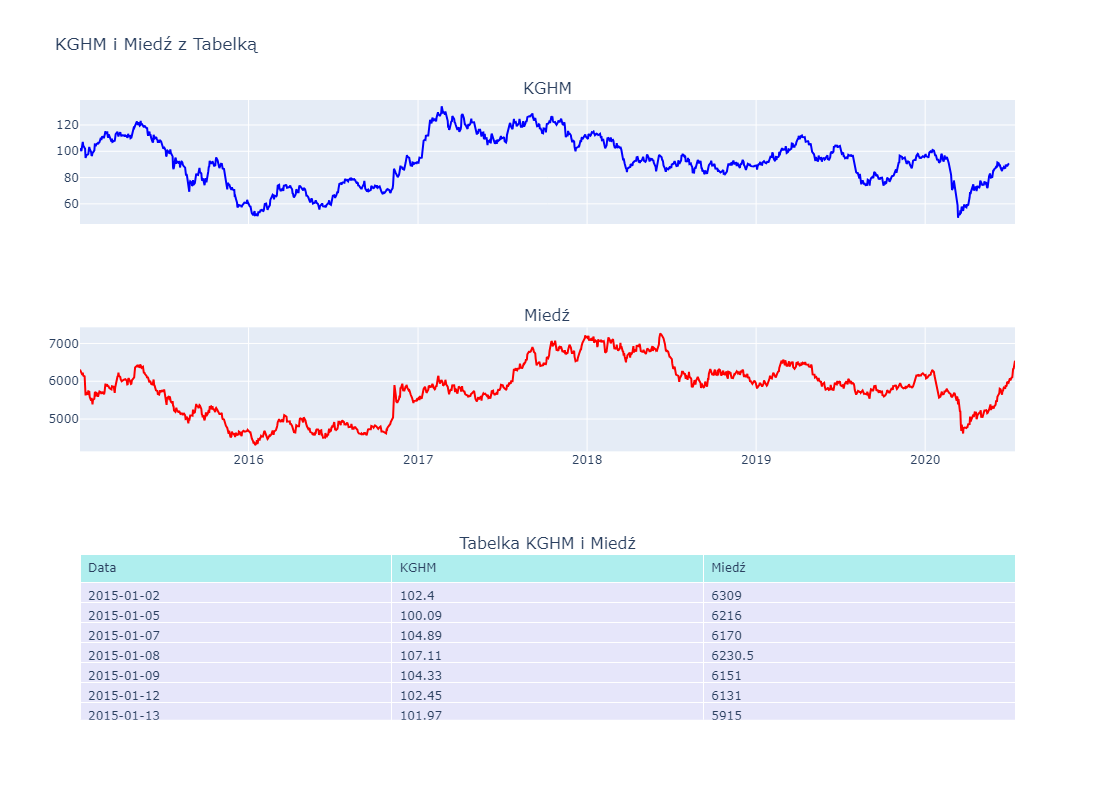

In [54]:

# Tworzenie subplots z dwoma wierszami i tabelą
fig = make_subplots(
    rows=3, cols=1, 
    shared_xaxes=True, 
    subplot_titles=('KGHM', 'Miedź', 'Tabelka KGHM i Miedź'),
    specs=[[{"type": "xy"}], [{"type": "xy"}], [{"type": "table"}]],  # Typ "table" dla trzeciego wiersza
    row_heights=[0.3, 0.3, 0.4]
)

# Wykres KGHM
fig.add_trace(go.Scatter(x=kghm.index, y=kghm['Zamkniecie'], mode='lines', line=dict(color='blue'), name='KGHM'),
              row=1, col=1)

# Wykres Miedź
fig.add_trace(go.Scatter(x=copper.index, y=copper['Zamkniecie'], mode='lines', line=dict(color='red'), name='Miedź'),
              row=2, col=1)

# Łączenie danych w jedną tabelę
combined_df = pd.merge(kghm[['Zamkniecie']], copper[['Zamkniecie']], 
                       left_index=True, right_index=True, suffixes=('_KGHM', '_Miedz'))

# Dodawanie tabelki do wykresu
fig.add_trace(
    go.Table(
        header=dict(values=['Data', 'KGHM', 'Miedź'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[combined_df.index.strftime('%Y-%m-%d'), combined_df['Zamkniecie_KGHM'], combined_df['Zamkniecie_Miedz']],
                   fill_color='lavender',
                   align='left')
    ),
    row=3, col=1
)

# Aktualizacja układu
fig.update_layout(height=800, title_text="KGHM i Miedź z Tabelką", showlegend=False)
fig.show()